In [199]:
import pandas as pd             # Import pandas
import bar_chart_race as bcr    # Import bar_chart_race
import matplotlib.pyplot as plt # Import matplotlib

In [200]:
df = pd.read_csv('os.csv')      # Load the data
df.head()                       # Display the first 5 rows

,Date,Windows,Android,iOS,OS X,Unknown,Linux,Series 40,SymbianOS,Samsung,...,Playstation,Sony Ericsson,KaiOS,Xbox,bada,Tizen,LG,Nintendo,macOS,Other
0,2009-01,94.80,0.00,0.24,3.66,0.27,0.64,0.0,0.26,0.0,...,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.01
1,2009-02,94.74,0.01,0.25,3.73,0.22,0.61,0.0,0.26,0.0,...,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.02
2,2009-03,94.48,0.02,0.32,3.84,0.25,0.64,0.0,0.28,0.0,...,0.11,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.01
3,2009-04,94.32,0.02,0.36,3.89,0.26,0.66,0.0,0.30,0.0,...,0.12,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.01
4,2009-05,94.44,0.02,0.32,3.72,0.32,0.64,0.0,0.34,0.0,...,0.12,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.01


In [201]:
df2 = df.drop(columns=['Unknown']).rename(columns={'Nokia Unknown': 'Nokia_Other'})   # Drop 'Unknown' column and rename 'Nokia Unknown'
df2['Date'] = pd.to_datetime(df['Date'], format='%Y-%m', errors='coerce')             # Convert 'Date' to datetime
df3 = df2.dropna(subset=['Date'])                                                     # Drop rows with missing dates
df3.set_index('Date', inplace=True)                                                   # Set 'Date' as index
df3 = df3.sort_index()                                                                # Sort by date
df3.head()                                                                            # Display the first 5 rows

,Windows,Android,iOS,OS X,Linux,Series 40,SymbianOS,Samsung,BlackBerry OS,Chrome OS,...,Playstation,Sony Ericsson,KaiOS,Xbox,bada,Tizen,LG,Nintendo,macOS,Other
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,94.80,0.00,0.24,3.66,0.64,0.0,0.26,0.0,0.01,0.0,...,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.01
2009-02-01,94.74,0.01,0.25,3.73,0.61,0.0,0.26,0.0,0.04,0.0,...,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.02
2009-03-01,94.48,0.02,0.32,3.84,0.64,0.0,0.28,0.0,0.05,0.0,...,0.11,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.01
2009-04-01,94.32,0.02,0.36,3.89,0.66,0.0,0.30,0.0,0.06,0.0,...,0.12,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.01
2009-05-01,94.44,0.02,0.32,3.72,0.64,0.0,0.34,0.0,0.06,0.0,...,0.12,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.01


In [202]:
df3.describe()                         # Get descriptive statistics

,Windows,Android,iOS,OS X,Linux,Series 40,SymbianOS,Samsung,BlackBerry OS,Chrome OS,...,Playstation,Sony Ericsson,KaiOS,Xbox,bada,Tizen,LG,Nintendo,macOS,Other
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.00000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,51.633384,26.188030,11.046566,6.015152,0.967424,0.494040,0.472323,0.288434,0.23803,0.419495,...,0.080101,0.044697,0.051667,0.035404,0.013889,0.018535,0.012677,0.008939,0.033535,0.025253
std,23.586192,17.296846,5.885266,1.102477,0.259701,0.786776,0.671514,0.236001,0.26426,0.424944,...,0.047324,0.060039,0.105314,0.090848,0.022248,0.032980,0.018590,0.009473,0.245625,0.041638
min,24.650000,0.000000,0.240000,3.470000,0.610000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.157500,6.040000,6.812500,5.395000,0.770000,0.000000,0.000000,0.140000,0.00000,0.012500,...,0.042500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.140000,36.815000,12.765000,5.885000,0.860000,0.010000,0.125000,0.210000,0.10000,0.315000,...,0.080000,0.010000,0.000000,0.020000,0.000000,0.000000,0.000000,0.010000,0.000000,0.020000
75%,74.905000,40.447500,16.510000,6.540000,1.140000,0.757500,0.737500,0.347500,0.47000,0.677500,...,0.110000,0.080000,0.070000,0.030000,0.020000,0.020000,0.020000,0.020000,0.000000,0.030000
max,94.800000,47.860000,18.490000,9.320000,1.640000,2.890000,2.830000,1.010000,0.88000,1.860000,...,0.180000,0.210000,0.560000,0.650000,0.080000,0.130000,0.080000,0.030000,2.020000,0.280000


In [203]:
df3.info()                             # Get info about the DataFrame

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 198 entries, 2009-01-01 to 2025-06-01
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Windows        198 non-null    float64
 1   Android        198 non-null    float64
 2   iOS            198 non-null    float64
 3   OS X           198 non-null    float64
 4   Linux          198 non-null    float64
 5   Series 40      198 non-null    float64
 6   SymbianOS      198 non-null    float64
 7   Samsung        198 non-null    float64
 8   BlackBerry OS  198 non-null    float64
 9   Chrome OS      198 non-null    float64
 10  Nokia_Other    198 non-null    float64
 11  Playstation    198 non-null    float64
 12  Sony Ericsson  198 non-null    float64
 13  KaiOS          198 non-null    float64
 14  Xbox           198 non-null    float64
 15  bada           198 non-null    float64
 16  Tizen          198 non-null    float64
 17  LG             198 non-null    floa

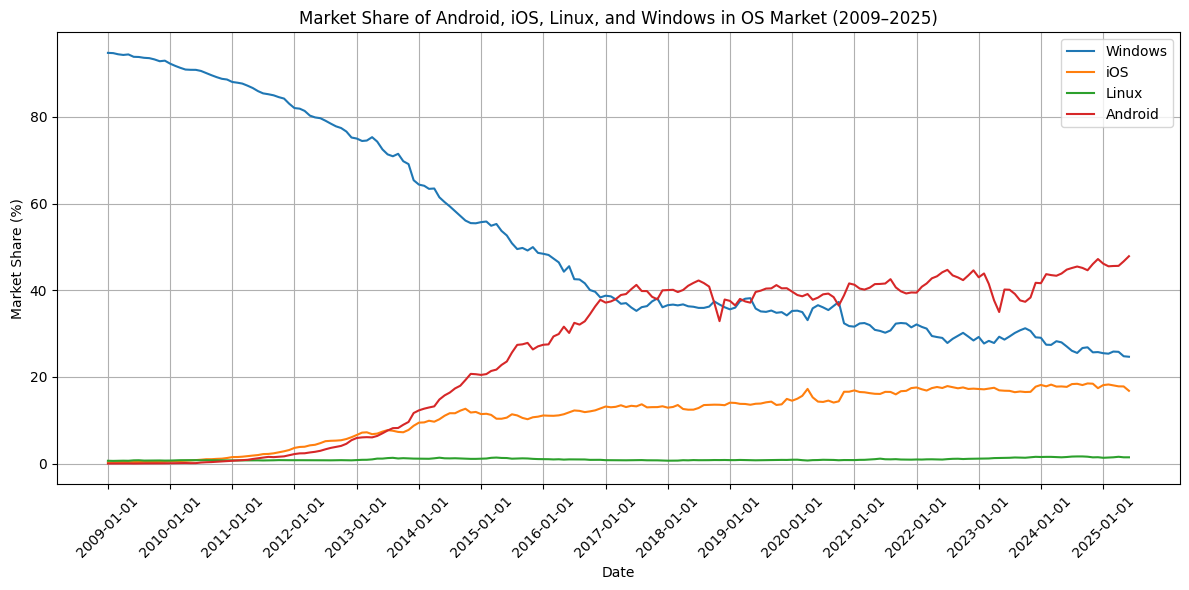

In [204]:
plt.figure(figsize=(12, 6))                           # Create a figure

for col in ['Windows', 'iOS', 'Linux', 'Android']:    # Plot key OS market shares
    plt.plot(df3.index, df3[col], label=col)

plt.xlabel('Date')               # Set x-axis label
plt.ylabel('Market Share (%)')   # Set y-axis label
plt.title('Market Share of Android, iOS, Linux, and Windows in OS Market (2009–2025)')    # Set title
plt.xticks(df3.index[::12], rotation=45)      # Set x-axis ticks

plt.legend()           # Display legend
plt.grid(True)         # Add grid
plt.tight_layout()     # Adjust layout
plt.show()             # Show the plot

In [205]:
bcr.bar_chart_race(                                                    # Generate bar chart race
    df=df3,                                                            # Use the DataFrame
    filename='osMarketShare.mp4',                                      # Output file name
    orientation='h',                                                   # Horizontal bars
    sort='desc',                                                       # Sort descending
    n_bars=10,                                                         # Top 10 bars
    fixed_order=False,                                                 # Do not fix order
    fixed_max=True,                                                    # Fix max value
    steps_per_period=30,                                               # Frames per period
    interpolate_period=True,                                           # Interpolate values
    period_length=500,                                                 # Period duration
    period_fmt='%b %Y',                                                # Period label format
    title='OS Market Share Evolution in % (2009–2025)',                # Title
    bar_size=0.6,                                                      # Bar size
    cmap='tab20',                                                      # Colormap
    figsize=(8, 5),                                                    # Figure size
    dpi=200,                                                           # DPI
    bar_label_size=11,                                                 # Bar label font size
    tick_label_size=10,                                                # Tick label font size
    period_label={'x': .95, 'y': .15, 'ha': 'right', 'va': 'center',
                  'fontsize': 14, 'color': '#333333'},                 # Period label style
    title_size=18,                                                     # Title font size
    shared_fontdict={'family': 'Arial', 'color': '#111111'}            # Font dictionary
)

c:\Program Files\Python311\Lib\site-packages\bar_chart_race\_make_chart.py:286: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(self.df_values.columns)
c:\Program Files\Python311\Lib\site-packages\bar_chart_race\_make_chart.py:287: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))
c:\Program Files\Python311\Lib\site-packages\bar_chart_race\_make_chart.py:226: UserWarning: Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`
  warnings.warn("Some of your columns never make an appearance in the animation. "
